In [1]:
import pandas as pd

titanic_df = pd.read_csv("C:/Users/wjddu/git/BigData/titanic/titanic.csv")

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  895 non-null    int64  
 1   Survived     895 non-null    int64  
 2   Pclass       895 non-null    int64  
 3   Name         895 non-null    object 
 4   Gender       895 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        895 non-null    int64  
 7   Parch        895 non-null    int64  
 8   Ticket       895 non-null    object 
 9   Fare         884 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     893 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


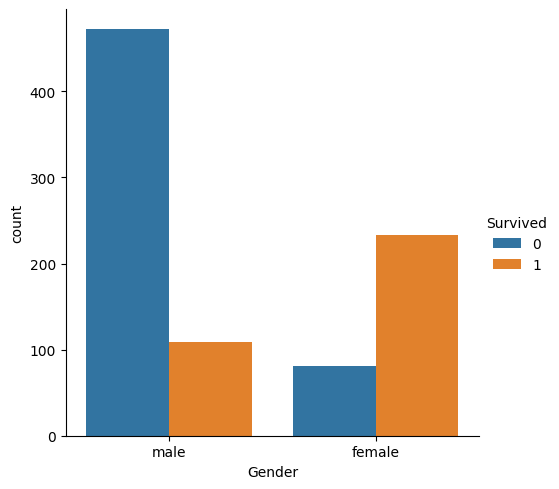

In [5]:
import seaborn as sns

sns.catplot(x ="Gender", hue ="Survived", kind ="count", data = titanic_df)

In [6]:
titanic_df.drop(columns='Name', inplace=True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.drop(columns=['Cabin', 'Ticket', 'Embarked'], inplace=True)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [8]:
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
891,891,0,3,male,32.0,0,0,7.75
892,891,0,3,male,32.0,0,0,7.75
893,891,0,3,male,32.0,0,0,7.75
894,891,0,3,male,32.0,0,0,7.75


In [9]:
titanic_df.drop_duplicates(inplace = True)
titanic_df[titanic_df.duplicated()]
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
881,882,0,3,male,33.0,0,0,7.8958
882,883,0,3,female,22.0,0,0,10.5167
883,884,0,2,male,28.0,0,0,10.5000
884,885,0,3,male,25.0,0,0,7.0500
885,886,0,3,female,39.0,0,5,29.1250
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000
890,891,0,3,male,32.0,0,0,7.7500


In [10]:
titanic_df.isnull().head(10)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


<AxesSubplot:>

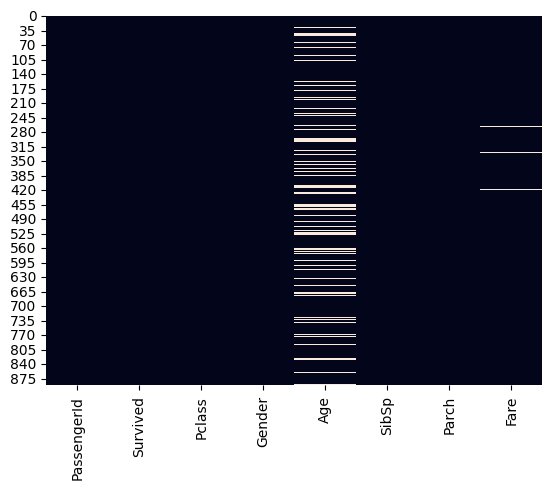

In [11]:
import seaborn as sns

sns.heatmap(titanic_df.isnull(), cbar=False)


In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare            11
dtype: int64

In [13]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Gender          0
Age             0
SibSp           0
Parch           0
Fare           11
dtype: int64

In [14]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [15]:
titanic_df.head(10)
titanic_df.replace({'Gender': {'male': 0}}, inplace = True)
titanic_df.replace({'Gender': {'female': 1}}, inplace = True)

<AxesSubplot:ylabel='Fare'>

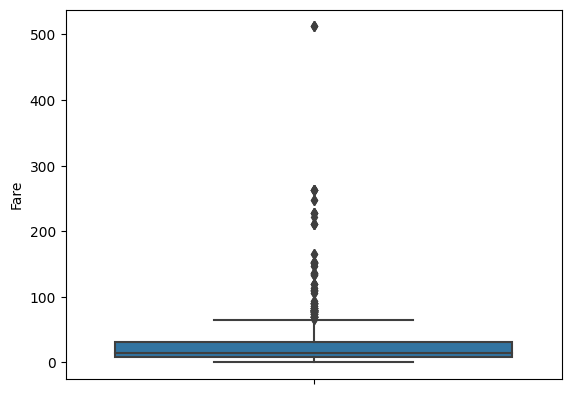

In [16]:
sns.boxplot(y = titanic_df['Fare'] )

<AxesSubplot:ylabel='Fare'>

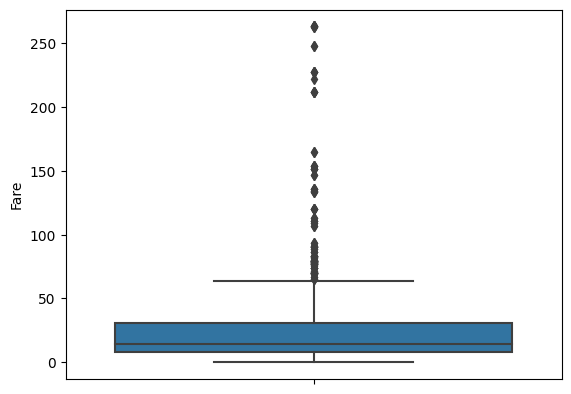

In [17]:
titanic_df.drop(titanic_df[titanic_df.Fare >= 500].index, inplace = True)
sns.boxplot(y = titanic_df['Fare'] )

In [18]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,447.272520,0.379704,2.314709,0.348917,29.774818,0.523375,0.379704,30.470386
std,258.040911,0.485590,0.833886,0.476900,13.033179,1.103528,0.808459,41.212739
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,449.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,670.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

titanic_df[['Fare']] = scaler.fit_transform(titanic_df[['Fare']])

titanic_df.describe()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,447.272520,0.379704,2.314709,0.348917,29.774818,0.523375,0.379704,0.115857
std,258.040911,0.485590,0.833886,0.476900,13.033179,1.103528,0.808459,0.156702
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.030022
50%,449.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,0.054959
75%,670.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,0.116714
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000


<AxesSubplot:>

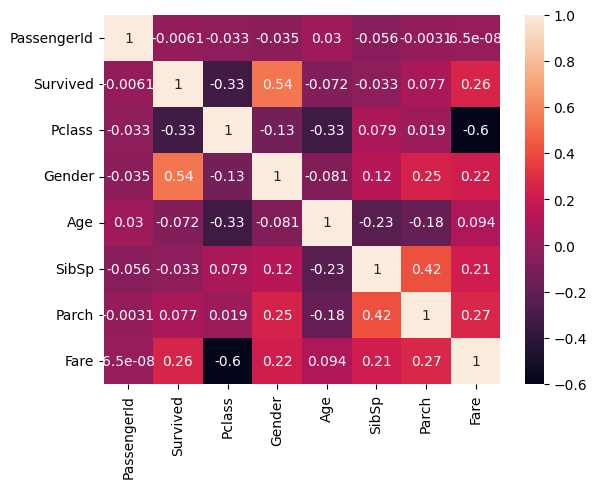

In [20]:
sns.heatmap(titanic_df.corr(), annot=True)